<a href="https://colab.research.google.com/github/SuraRzayeva/CustomerChurn/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, precision_recall_curve

In [2]:
rawData = pd.read_csv('Telecom_churn_seminar.csv')

In [ ]:
rawData.columns

In [83]:
X = rawData.loc[:, rawData.columns != 'churn']
y = rawData.loc[:, 'churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=130, criterion="entropy")
model_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=130)

In [6]:
RF_prediction = model_RF.predict(X_test)

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, RF_prediction)

auc(fpr, tpr)

0.6158049930295695

In [8]:
accuracy_score(y_test, RF_prediction)

0.6160599571734475

In [70]:
precision_score(y_test, RF_prediction)

0.616546438232642

In [71]:
recall_score(y_test, RF_prediction)

0.591991341991342

In [72]:
f1_score(y_test, RF_prediction)

0.6040194346289753

In [ ]:
!pip install scikit-plot

In [11]:
import matplotlib.pyplot as plt
import scikitplot as skplt

In [30]:
pred_RF = model_RF.predict_proba(X_test)

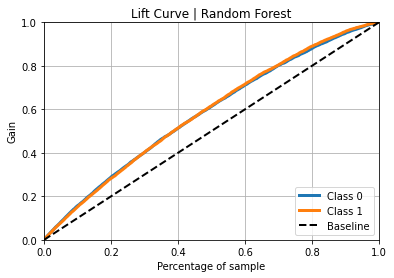

In [36]:
skplt.metrics.plot_cumulative_gain(y_test, pred_RF, title='Lift Curve | Random Forest')

In [63]:
from sklearn.metrics import ndcg_score

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [38]:
LR_prediction = model_LR.predict(X_test)

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, LR_prediction)

auc(fpr, tpr)

0.578210983931323

In [40]:
accuracy_score(y_test, LR_prediction)

0.578693790149893

In [73]:
precision_score(y_test, LR_prediction)

0.580759254892714

In [74]:
recall_score(y_test, LR_prediction)

0.5331168831168831

In [75]:
f1_score(y_test, LR_prediction)

0.5559191964789527

In [41]:
pred_LR = model_LR.predict_proba(X_test)

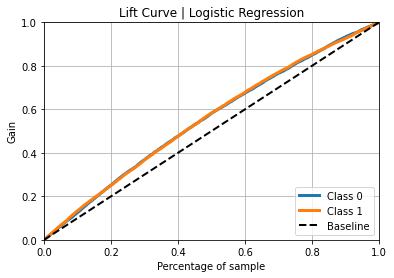

In [42]:
skplt.metrics.plot_cumulative_gain(y_test, pred_LR, title='Lift Curve | Logistic Regression')

## K-nearest neighbour

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
KNN_prediction = model_KNN.predict(X_test)

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, KNN_prediction)

auc(fpr, tpr)

0.5393494570401349

In [46]:
accuracy_score(y_test, KNN_prediction)

0.5398286937901499

In [76]:
precision_score(y_test, KNN_prediction)

0.5379001883239172

In [77]:
recall_score(y_test, KNN_prediction)

0.4945887445887446

In [78]:
f1_score(y_test, KNN_prediction)

0.5153360396932793

In [47]:
pred_KNN = model_KNN.predict_proba(X_test)

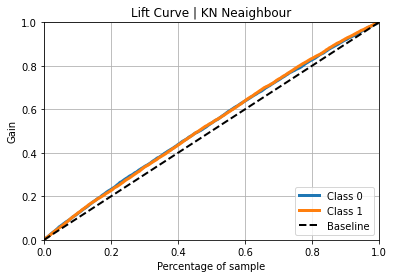

In [48]:
skplt.metrics.plot_cumulative_gain(y_test, pred_KNN, title='Lift Curve | KN Neaighbour')

## Decision Tree

In [49]:
from sklearn import tree

model_DT = tree.DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
DT_prediction = model_DT.predict(X_test)

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, DT_prediction)

auc(fpr, tpr)

0.5500784173453666

In [52]:
accuracy_score(y_test, DT_prediction)

0.5501070663811564

In [79]:
precision_score(y_test, DT_prediction)

0.5450431034482759

In [80]:
recall_score(y_test, DT_prediction)

0.5474025974025974

In [81]:
f1_score(y_test, DT_prediction)

0.5462203023758099

In [53]:
pred_DT = model_DT.predict_proba(X_test)

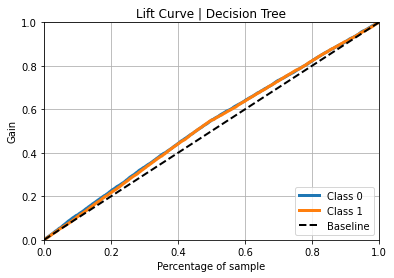

In [54]:
skplt.metrics.plot_cumulative_gain(y_test, pred_DT, title='Lift Curve | Decision Tree')

## Reliability Curves

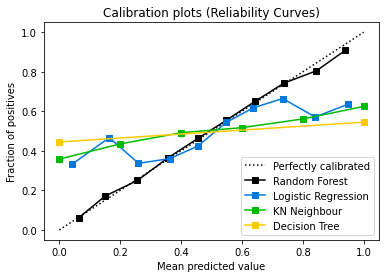

In [56]:
probas_list = [pred_RF, pred_LR, pred_KNN, pred_DT]

clf_names = ['Random Forest', 'Logistic Regression', 'KN Neighbour', 'Decision Tree']

skplt.metrics.plot_calibration_curve(y_test, probas_list, clf_names)

## Feature Importance

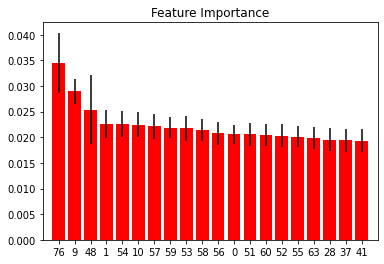

In [57]:
skplt.estimators.plot_feature_importances(model_RF)

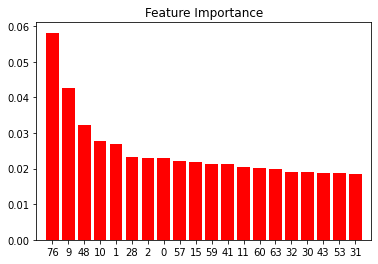

In [58]:
skplt.estimators.plot_feature_importances(model_DT)